<a href="https://colab.research.google.com/github/NaviinRaghav/Task/blob/main/Project_1_%E2%80%93_Climate_Change_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

In [19]:
# Load dataset with 'Year' as index
data = pd.read_csv("climate_data.csv", index_col='Year')

In [20]:
print(data.head())

        Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
Year                                                                 
2006         UK                   8.9                          9.3   
2019        USA                  31.0                          4.8   
2014     France                  33.9                          2.8   
2010  Argentina                   5.9                          1.8   
2007    Germany                  26.9                          5.6   

      Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Energy (%)  \
Year                                                                         
2006                  3.1           1441   530911230                  20.4   
2019                  4.2           2407   107364344                  49.2   
2014                  2.2           1241   441101758                  33.3   
2010                  3.2           1892  1069669579                  23.7   
2007                  2.4           1743 

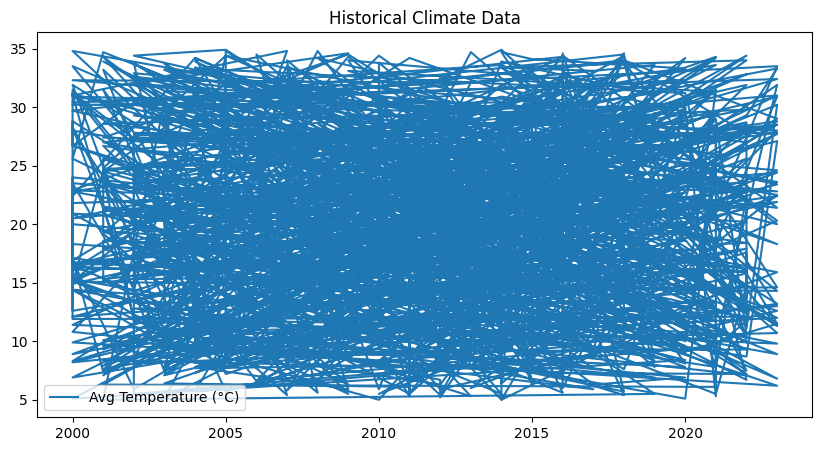

In [22]:
# Plot data
plt.figure(figsize=(10,5))
plt.plot(data['Temperature'], label="Temperature")
plt.title("Historical Climate Data")
plt.legend()
plt.show()


In [28]:
# Train-test split
train = data['Temperature'][:-50]
test = data['Temperature'][-50:]


Train and test sets created using 'Avg Temperature (°C)'.


In [38]:
# Build ARIMA model
# The index is now 'Year' which is supported by statsmodels for time series
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Avg Temperature (°C)   No. Observations:                  950
Model:                   ARIMA(5, 1, 0)   Log Likelihood               -3445.964
Date:                  Sun, 14 Sep 2025   AIC                           6903.927
Time:                          14:41:06   BIC                           6933.059
Sample:                               0   HQIC                          6915.027
                                  - 950                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8016      0.033    -24.400      0.000      -0.866      -0.737
ar.L2         -0.6484      0.040    -16.219      0.000      -0.727      -0.570
ar.L3         -0.4624      0.043    

In [39]:
# Forecast
# The forecast will use the 'Year' index from the test set
forecast = model_fit.forecast(steps=len(test))
print("Forecast generated.")

Forecast generated.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


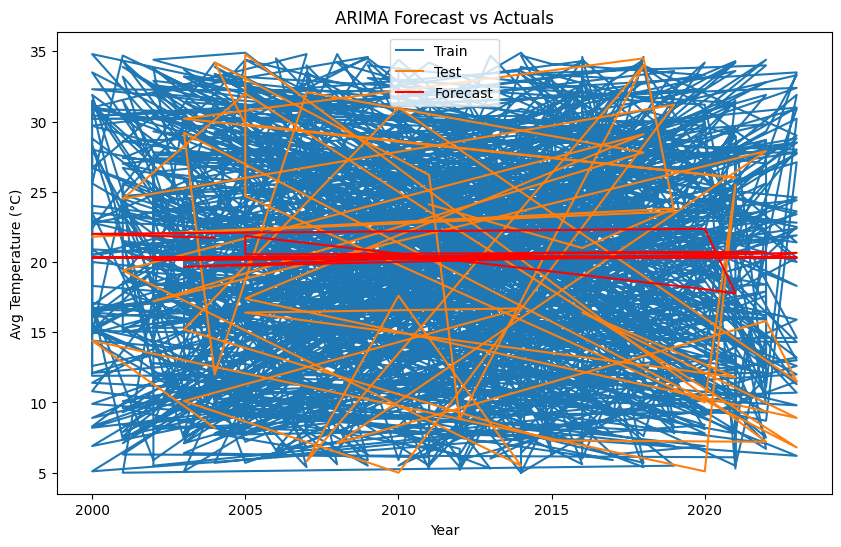

In [40]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.title("ARIMA Forecast vs Actuals")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.legend()
plt.show()

In [41]:
# Calculate Mean Squared Error
mse = mean_squared_error(test, forecast)
print("Mean Squared Error (MSE) of the forecast:", mse)

Mean Squared Error (MSE) of the forecast: 92.76901495685328


In [33]:
data = pd.DataFrame({
    "Year": range(2000, 2021),
    "Temperature": [14.1,14.2,14.3,14.5,14.6,14.7,14.9,15.0,15.1,15.2,15.3,15.4,15.6,15.7,15.8,16.0,16.1,16.2,16.3,16.5,16.7],
    "CO2": [370,372,374,376,379,381,383,386,389,392,395,398,401,404,407,410,413,416,419,422,425]
})

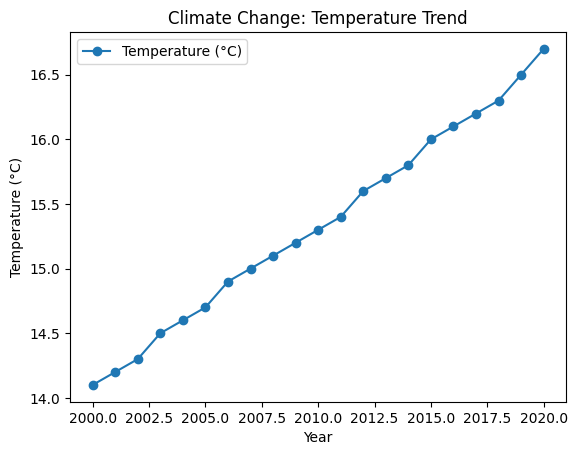

In [34]:
# Line chart - Temperature over years
plt.plot(data["Year"], data["Temperature"], marker='o', label="Temperature (°C)")
plt.title("Climate Change: Temperature Trend")
plt.xlabel("Year"); plt.ylabel("Temperature (°C)")
plt.legend(); plt.show()


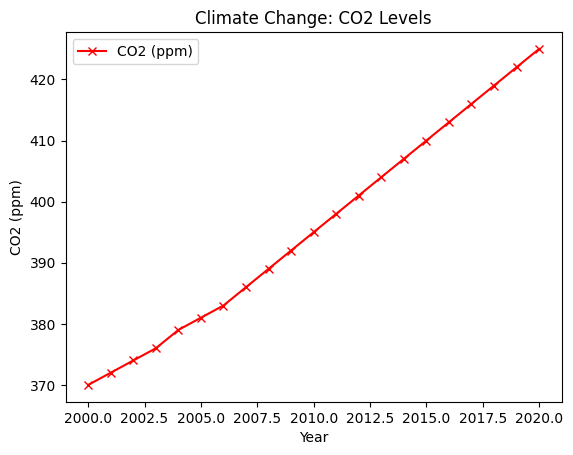

In [35]:
# Line chart - CO2 levels
plt.plot(data["Year"], data["CO2"], color="red", marker="x", label="CO2 (ppm)")
plt.title("Climate Change: CO2 Levels")
plt.xlabel("Year"); plt.ylabel("CO2 (ppm)")
plt.legend(); plt.show()

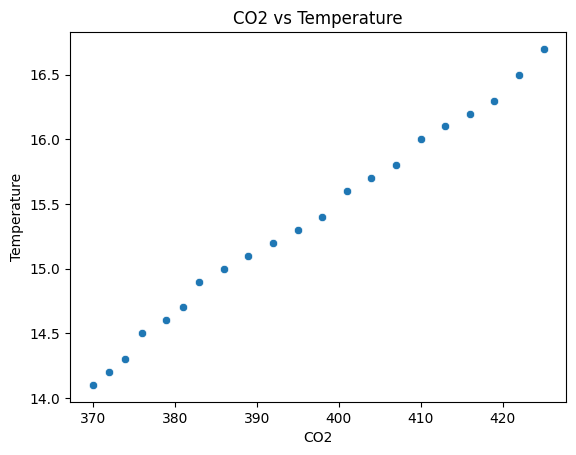

In [36]:
# Scatter Plot - CO2 vs Temperature==
sns.scatterplot(x=data["CO2"], y=data["Temperature"])
plt.title("CO2 vs Temperature")
plt.show()

In [43]:
!pip install streamlit plotly-express

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.0 MB/s eta 0:00:00


In [47]:
import streamlit as st
import plotly.express as px
import pandas as pd

st.title("🌍 Climate Change Dashboard")

# Upload dataset
file = st.file_uploader("Upload Climate Dataset", type=["csv"])
if file is not None:
    data = pd.read_csv(file)
    st.write("### Dataset Preview", data.head())

    # Line chart - Temperature
    fig1 = px.line(data, x="Year", y="Temperature", title="🌡️ Temperature Trend")
    st.plotly_chart(fig1)

    # Line chart - CO2 levels
    fig2 = px.line(data, x="Year", y="CO2", title="🌫️ CO2 Levels")
    st.plotly_chart(fig2)

    # Scatter plot - CO2 vs Temperature
    fig3 = px.scatter(data, x="CO2", y="Temperature", title="CO2 vs Temperature")
    st.plotly_chart(fig3)


2025-09-14 14:44:41.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 14:44:41.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 14:44:41.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 14:44:41.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 14:44:41.611 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 14:44:41.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 14:44:41.614 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 14:44:41.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar